#### Project 6 Linear Regression
## Beau Martin & Joshua Christensen


In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf

In [2]:
df = pd.read_csv('data/RRCA_baseflow.csv')
df['Date'] = df['Date'] - 693963
df

,Date,Segment_id,x,y,Evapotranspiration,Precipitation,Irrigation_pumping,Observed
0,16769,144,1086190,14476800,0.59,18.99,0.0,0.145161
1,16800,144,1086190,14476800,0.97,29.63,0.0,0.445161
2,16828,144,1086190,14476800,1.34,29.63,0.0,1.332203
3,16859,144,1086190,14476800,1.79,29.63,0.0,2.932203
4,16889,144,1086190,14476800,8.23,29.63,0.0,3.728689
...,...,...,...,...,...,...,...,...
15586,27847,98,721870,14387040,0.00,0.00,0.0,0.298500
15587,27878,98,721870,14387040,0.00,0.00,0.0,0.211475
15588,27908,98,721870,14387040,0.00,0.00,0.0,0.122951
15589,27939,98,721870,14387040,0.00,0.00,0.0,0.120000


In [3]:
# Number of segmant ids
df['Segment_id'].nunique()

42

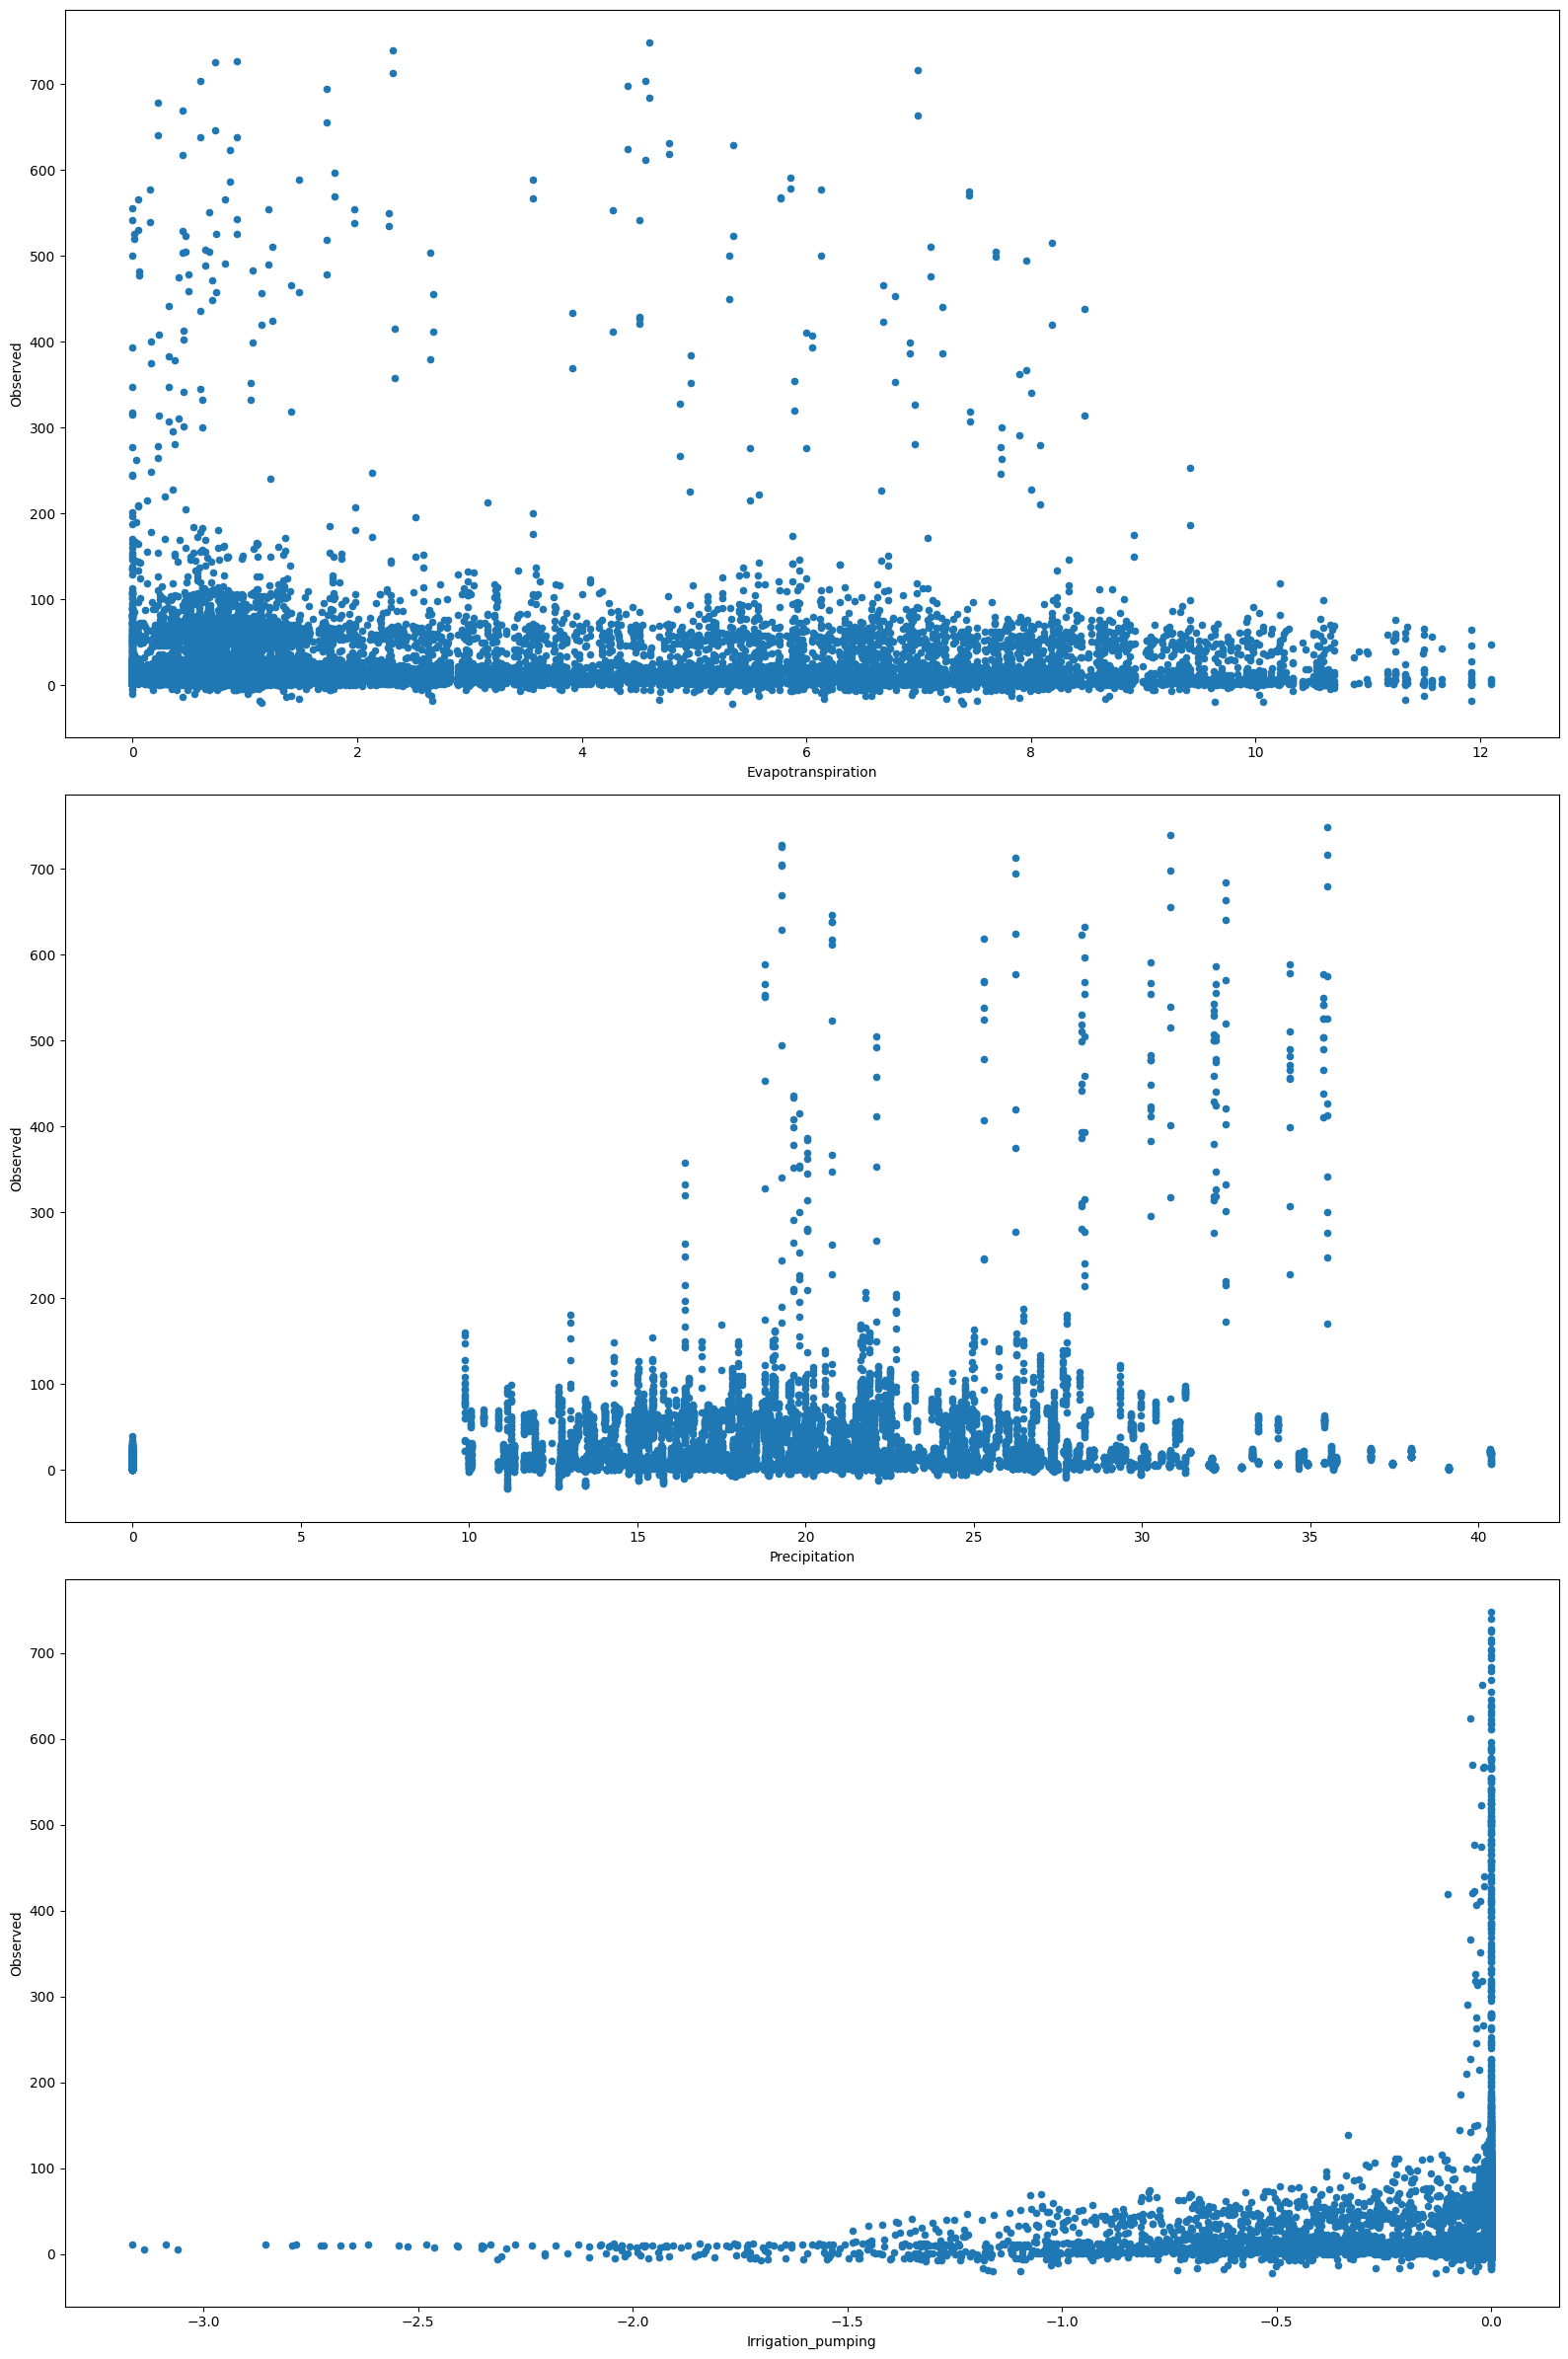

In [4]:
fig, axs = plt.subplots(nrows=3, ncols=1, sharey=True, figsize=(16, 24)) 

df.plot(kind='scatter', x='Evapotranspiration', y='Observed', ax=axs[0])
df.plot(kind='scatter', x='Precipitation', y='Observed', ax=axs[1])
df.plot(kind='scatter', x='Irrigation_pumping', y='Observed', ax=axs[2])

plt.tight_layout() 
plt.show()

### Does precipitation have an affect on baseflow?

In [5]:
print(df['Precipitation'].max())

df[df['Precipitation'] == 40.38]

40.38


,Date,Segment_id,x,y,Evapotranspiration,Precipitation,Irrigation_pumping,Observed
365,18626,171,1508590,14524320,0.85,40.38,0.000000,6.754839
366,18654,171,1508590,14524320,1.09,40.38,0.000000,6.761017
367,18685,171,1508590,14524320,1.53,40.38,0.000000,8.861017
368,18715,171,1508590,14524320,2.50,40.38,0.000000,10.665574
369,18746,171,1508590,14524320,5.95,40.38,0.000000,12.065574
370,18776,171,1508590,14524320,5.88,40.38,-0.001302,14.250000
371,18807,171,1508590,14524320,6.00,40.38,-0.002743,17.300000
372,18838,171,1508590,14524320,5.46,40.38,-0.002812,19.121312
373,18868,171,1508590,14524320,3.43,40.38,-0.001816,19.571312
374,18899,171,1508590,14524320,2.90,40.38,0.000000,19.283607


In [6]:
# Looking at segment 171 because it had the highest ever precipiation
df_171 = df[df['Segment_id'] == 171]
df_171 = df_171[df_171['Precipitation'] != 0]
print(df_171['Date'].nunique())
df_171

368


,Date,Segment_id,x,y,Evapotranspiration,Precipitation,Irrigation_pumping,Observed
297,16555,171,1508590,14524320,6.63,21.41,0.000000,7.645161
298,16585,171,1508590,14524320,6.59,21.41,0.000000,10.363934
299,16616,171,1508590,14524320,8.65,21.41,0.000000,7.763934
300,16647,171,1508590,14524320,7.23,21.41,0.000000,4.826230
301,16677,171,1508590,14524320,6.38,21.41,0.000000,1.626229
...,...,...,...,...,...,...,...,...
660,34179,171,1508590,14524320,5.02,39.12,-0.365750,1.500000
661,34209,171,1508590,14524320,5.66,39.12,-0.170400,1.500000
662,34240,171,1508590,14524320,3.80,39.12,-0.015535,1.844262
663,34270,171,1508590,14524320,1.66,39.12,0.000000,2.544262


<Axes: xlabel='Date', ylabel='Precipitation'>

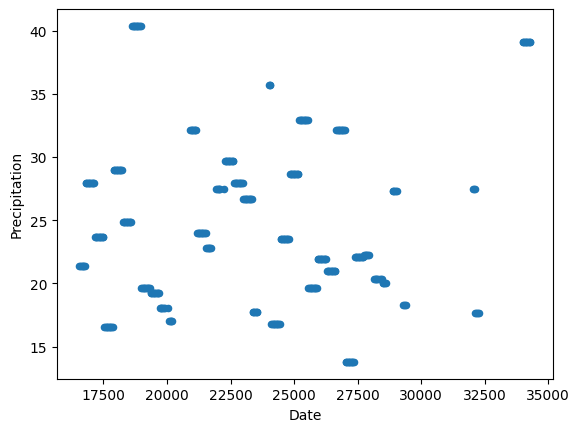

In [7]:
df_171.plot(kind='scatter', x='Date', y='Precipitation')


<Axes: xlabel='Precipitation', ylabel='Observed'>

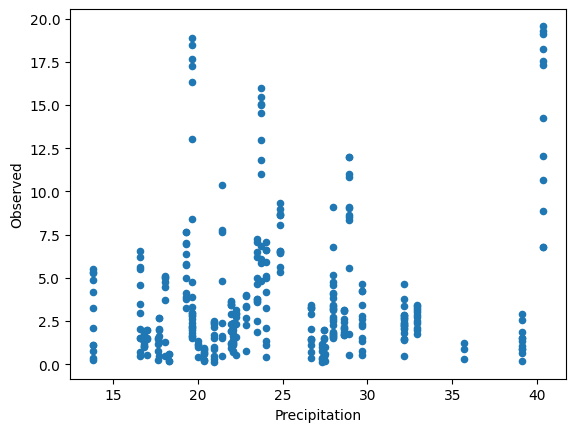

In [8]:
df_171.plot(kind='scatter', x='Precipitation', y='Observed')

In [9]:
# create X and y
feature_cols = ['Precipitation']
X = df_171[feature_cols]
y = df_171.Observed

# follow the usual sklearn pattern: import, instantiate, fit
lm = LinearRegression()
lm.fit(X, y)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

0.9833323325095189
[0.11389772]


<Axes: xlabel='Precipitation', ylabel='Observed'>

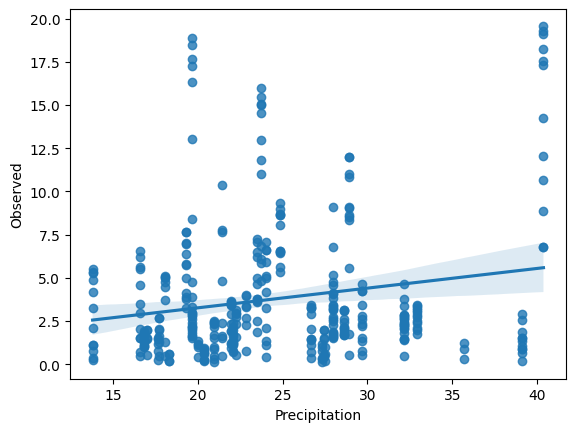

In [10]:
sns.regplot(x='Precipitation', y='Observed', data=df_171)

In [11]:
lm = smf.ols(formula='Observed ~ Precipitation', data=df_171).fit()
# print the p-values for the model coefficients
lm.pvalues

Intercept        0.220776
Precipitation    0.000348
dtype: float64

### Next Part

Intercept             5.392192e-81
Irrigation_pumping    4.438227e-06
dtype: float64


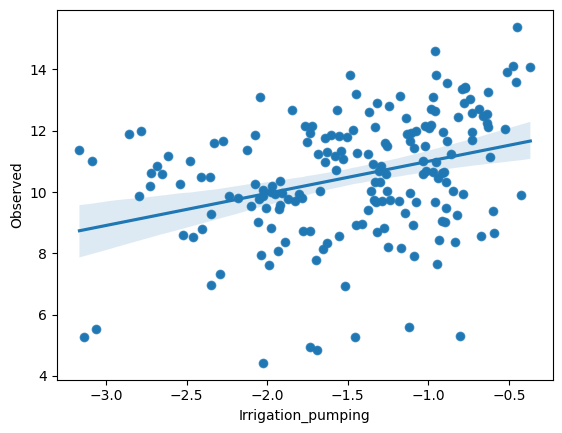

In [12]:
df = pd.read_csv('data/RRCA_baseflow.csv')
df['Date'] = df['Date'] - 693963

df[df['Irrigation_pumping'] == df.Irrigation_pumping.min()]

newDf = df[df['Segment_id'] == 59]
newDf = newDf[newDf['Irrigation_pumping'] < 0]
newDf.plot(kind='scatter', x='Irrigation_pumping', y='Observed')


# Perform a new Linear Regression Analysis
lm = LinearRegression()
x = [newDf['Irrigation_pumping']]
y = [newDf.Observed]
lm.fit(x, y)

sns.regplot(x='Irrigation_pumping', y='Observed', data=newDf)

lm = smf.ols(formula='Observed ~ Irrigation_pumping', data=newDf).fit()
print(lm.pvalues)

Intercept             9.969537e-18
Evapotranspiration    3.144007e-02
dtype: float64


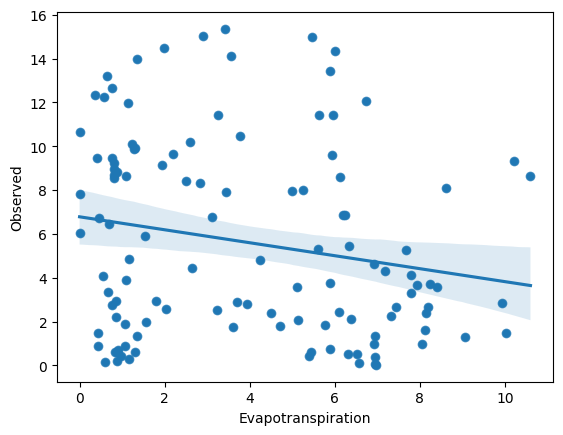

In [13]:
df = pd.read_csv('data/RRCA_baseflow.csv')
df['Date'] = df['Date'] - 693963

df[df['Evapotranspiration'] == df.Evapotranspiration.min()]

newDf = df[df['Segment_id'] == 144]
newDf.plot(kind='scatter', x='Evapotranspiration', y='Observed')


# Perform a new Linear Regression Analysis
lm = LinearRegression()
x = [newDf['Evapotranspiration']]
y = [newDf.Observed]
lm.fit(x, y)

sns.regplot(x='Evapotranspiration', y='Observed', data=newDf)

lm = smf.ols(formula='Observed ~ Evapotranspiration', data=newDf).fit()
print(lm.pvalues)